In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score

In [10]:
data = pd.read_csv('../dataset2/dataset_McCabe.csv')

Separação dos dados e dos rótulos.

In [11]:
X = data.drop('defects',axis=1)
y = data['defects']

Dividir os dados em conjuntos de treinamento e teste.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Normalização de dados.

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
predictions = rfc.predict(X_test)

In [16]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc') 

In [17]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Classe real',
           xlabel='Classe prevista')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


[[2849  190]
 [ 477  133]]


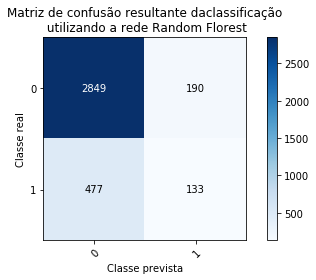

In [20]:
plot_confusion_matrix(y_test, predictions, classes=np.array([0,1]),
                      title='Matriz de confusão resultante da\
classificação\n utilizando a rede Random Florest');

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3039
           1       0.41      0.22      0.29       610

    accuracy                           0.82      3649
   macro avg       0.63      0.58      0.59      3649
weighted avg       0.78      0.82      0.79      3649



<div style='text-align:left;width:40%;float:left;'>
    <a href="./Random_Forest.ipynb">Anterior</a>
</div>
<div style='text-align:right;width:30%; float:right'>
    <a href="./SVM.ipynb">Próximo</a>
</div>

https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652